# Text Classification - Restaurant Reviews

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset
\t - tab

In [2]:
print('Example1\tExample2')

Example1	Example2


In [3]:
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

### Preprocess the data

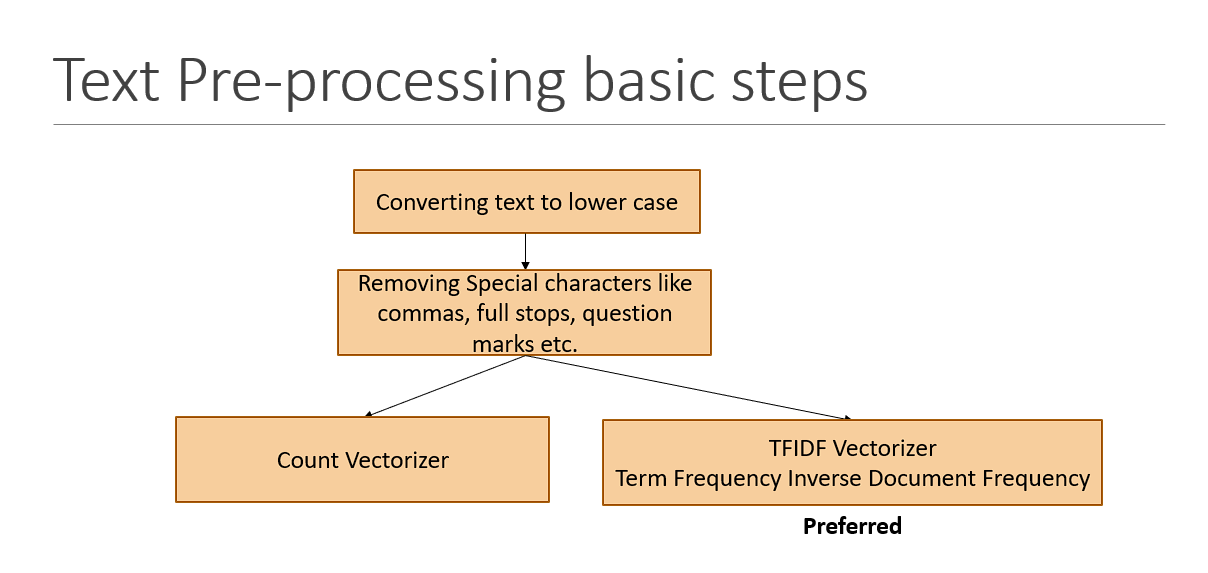

In [5]:
st = 'Hi All, Welcome to Deep Learning class at ETLHive!......'

In [6]:
st = st.lower()
st

'hi all, welcome to deep learning class at etlhive!......'

In [7]:
import re 
st = re.sub("[^a-z ]", '',st)
st

'hi all welcome to deep learning class at etlhive'

### Create function to preprocess a simple text data

In [8]:
def preprocess_text(st):
    # Convert statement into lower case
    st = st.lower()
    # Remove punctuations from the statement
    st = re.sub("[^a-z ]", '', st)
    return st

In [9]:
st = 'Hello! My name is Utkarsh. How are you?'
preprocess_text(st)

'hello my name is utkarsh how are you'

### Apply the function to orignal reviews

In [10]:
df['Review_pre'] = df['Review'].apply(preprocess_text)

In [11]:
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


### Seperate X and Y

In [12]:
X = df['Review_pre']
Y = df['Liked']

In [13]:
X.head()

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Review_pre, dtype: object

In [14]:
X[3]

'stopped by during the late may bank holiday off rick steve recommendation and loved it'

In [15]:
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

### Apply TFIDF Vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
X_pre.shape

(1000, 2046)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [19]:
xtrain.shape

(800, 2046)

In [20]:
xtest.shape

(200, 2046)

### Create a neural network

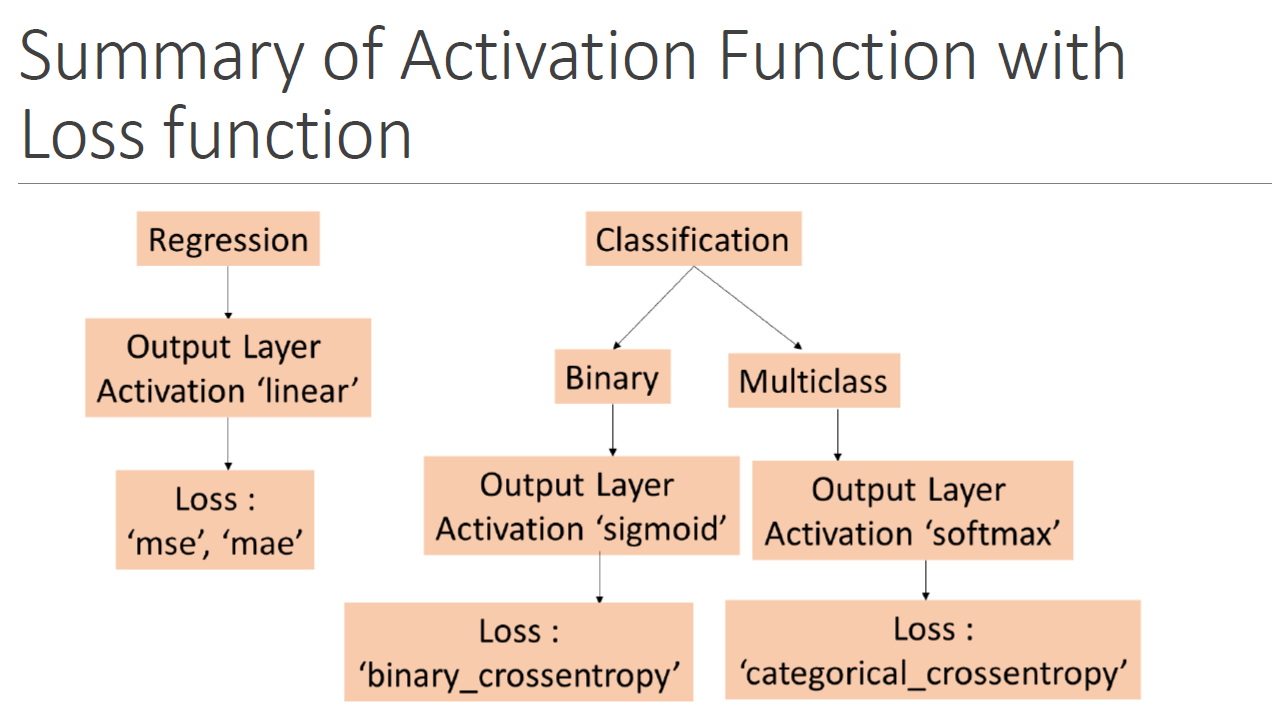

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [22]:
xtrain.shape[1]

2046

In [23]:
model = Sequential()

# Hidden Layer 1
model.add(Dense(256, activation='relu', input_dim=xtrain.shape[1]))
model.add(Dropout(0.6))

# Hidden Layer 2
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [26]:
hist = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=200, callbacks=[early_stop])

Epoch 1/200


25/25 [==============================] - 1s 15ms/step - loss: 0.6905 - accuracy: 0.5300 - val_loss: 0.6854 - val_accuracy: 0.7000
Epoch 2/200
25/25 [==============================] - 0s 9ms/step - loss: 0.6713 - accuracy: 0.7075 - val_loss: 0.6617 - val_accuracy: 0.7100
Epoch 3/200
25/25 [==============================] - 0s 9ms/step - loss: 0.5982 - accuracy: 0.8250 - val_loss: 0.5853 - val_accuracy: 0.8000
Epoch 4/200
25/25 [==============================] - 0s 9ms/step - loss: 0.4205 - accuracy: 0.9050 - val_loss: 0.4661 - val_accuracy: 0.8000
Epoch 5/200
25/25 [==============================] - 0s 10ms/step - loss: 0.2212 - accuracy: 0.9463 - val_loss: 0.4011 - val_accuracy: 0.8100
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 0.1161 - accuracy: 0.9663 - val_loss: 0.4212 - val_accuracy: 0.8150
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0618 - accuracy: 0.9837 - val_loss: 0.4018 - val_accuracy: 0.8200
Epoch 8/2

### View the learning curve

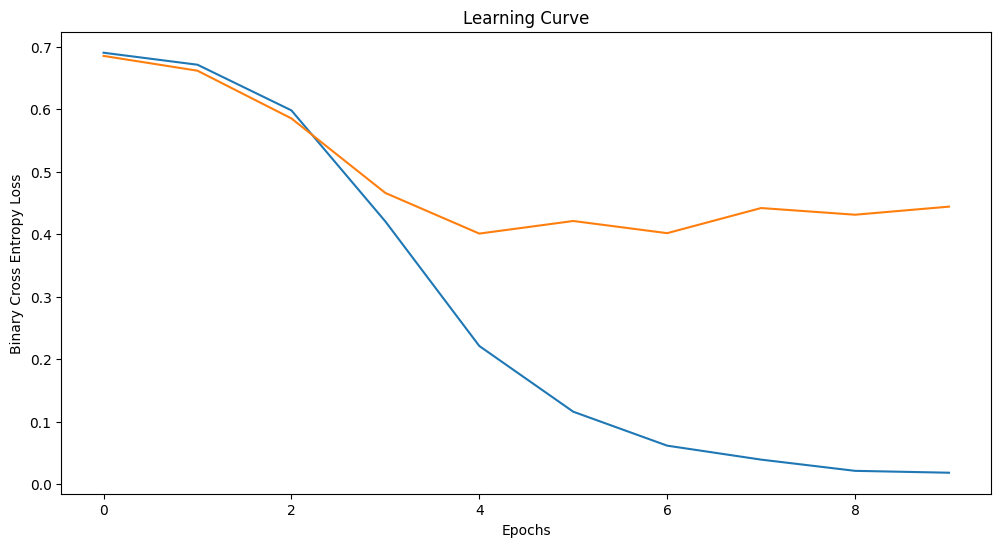

In [27]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Learning Curve')
plt.show()

### Evaluate model accuracy in train and test

In [28]:
model.evaluate(xtrain, ytrain)

25/25 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000


[0.004577678628265858, 1.0]

In [29]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8300


[0.4442131519317627, 0.8299999833106995]

### Predict prob for train and test

In [30]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

7/7 [==============================] - 0s 1ms/step


In [31]:
yprob_tr[0:5]

array([[9.8651695e-01],
       [9.9946189e-01],
       [9.9998784e-01],
       [1.6619117e-04],
       [8.2920352e-04]], dtype=float32)

In [32]:
yprob_ts[0:5]

array([[0.10146154],
       [0.00208662],
       [0.96142447],
       [0.9990664 ],
       [0.99985653]], dtype=float32)

### Convert probabilities in predictions

In [33]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr]
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts]

In [34]:
ypred_tr[0:5]

[1, 1, 1, 0, 0]

In [35]:
ytrain.head()

108    1
134    1
585    1
42     0
990    0
Name: Liked, dtype: int64

In [36]:
ypred_ts[0:5]

[0, 0, 1, 1, 1]

In [37]:
ytest.head()

492    0
383    0
856    1
834    1
603    1
Name: Liked, dtype: int64

### Create a confusion matrix for test

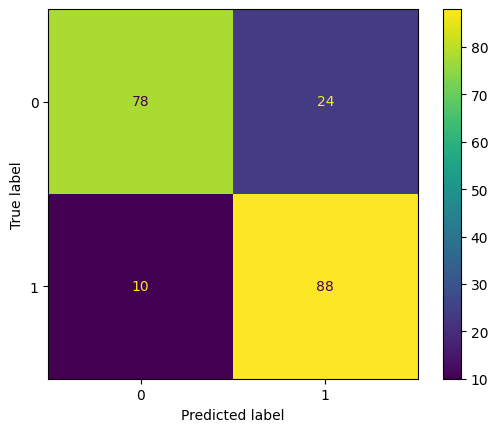

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Check the classification report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       102
           1       0.79      0.90      0.84        98

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



### Save the model for future use

In [40]:
model.save('TextClassify.keras')

### Load the above model

In [41]:
from keras.models import load_model
nn = load_model('TextClassify.keras')

In [42]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               524032    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 557057 (2.13 MB)
Trainable params: 557057 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Using the model for text classification

In [45]:
def predict_sentiment(tfidf, model):
    # Take statement input from user
    st = input('Please enter the review : ')
    # Preprocess the text
    st_pre = preprocess_text(st)
    # Show statement before preprocessing
    print(f'Before Preprocessing : {st}')
    print('\n========================================\n')
    print(f'After preprocessing : {st_pre}')
    # Apply tfidf.transform
    st_pre = tfidf.transform([st_pre]).toarray()
    # Predict the results
    prob = model.predict(st_pre)
    # Prediction
    if prob>=0.5:
        print('Given statement is POSITIVE')
    else:
        print('Given statement is NEGATIVE')
    return prob

In [46]:
predict_sentiment(tfidf, model)

Before Preprocessing : I really liked this place! , Very Good ambience ...


After preprocessing : i really liked this place  very good ambience 
1/1 [==============================] - 0s 59ms/step
Given statement is POSITIVE


array([[0.9993736]], dtype=float32)

In [47]:
predict_sentiment(tfidf, model)

Before Preprocessing : I did not liked the place, Pizza had poor flavour! Not Recommended!!!!


After preprocessing : i did not liked the place pizza had poor flavour not recommended
1/1 [==============================] - 0s 21ms/step
Given statement is NEGATIVE


array([[0.00119251]], dtype=float32)